In [ ]:
# Problem 1. Write a function in Python 3.x that, given an integer n, returns the sum of
# the first n terms of the series in the Leibniz formula.

In [178]:
def leibniz(n):
    l=0
    for i in range(n):
        l+=(-1)**i/(2*i+1)
    return l
leibniz(4)

0.7238095238095239

In [8]:
# Problem 2. For each of the following items, write a function in Python 3.x that, given an
# integer n, returns the sum of the first n terms of the series in the Leibniz formula.

In [ ]:
# a. Use a for-loop and an if-statement with the modulo operator % to determine whether
# to add or subtract each term.

In [179]:
def leibniz_a(n):
    l=0
    for i in range(n):
        if i%2==0:
            l+=1/(2*i+1)
        else:
            l-=1/(2*i+1)
    return l
leibniz_a(4)

0.7238095238095239

In [ ]:
# b. Use a for-loop with the quantity (-1)**n to determine whether to add or subtract
# each term.

In [180]:
def leibniz_b(n):
    l=0
    for i in range(n):
        l+=(-1)**i/(2*i+1)
    return l
##same as problem1
leibniz_b(4)

0.7238095238095239

In [ ]:
# c. Construct a Python list and compute the sum of the terms in the list.

In [181]:
def leibniz_c(n):
    l=[]
    for i in range(n):
        l.append((-1)**i/(2*i+1))
    return sum(l)
leibniz_c(4)

0.7238095238095239

In [ ]:
# d. Construct a Python set and compute the sum of the terms in the set.

In [182]:
def leibniz_d(n):
    l=set()
    for i in range(n):
        l.add((-1)**i/(2*i+1))
    return sum(l)
leibniz_d(4)

0.7238095238095239

In [ ]:
# e. Construct a Python dictionary and compute the sum of the terms in the dictionary.

In [183]:
def leibniz_e(n):
    l={}
    for i in range(n):
        l[i]=(-1)**i/(2*i+1)
    return sum(l.values())
leibniz_e(4)

0.7238095238095239

In [ ]:
# f. Construct a NumPy array and compute the sum of the terms in the array.

In [203]:
def leibniz_f(n):
    N=np.array(range(n))

    l=(-1)**N/(2*N+1)
    # print(l)
    
    return np.sum(l)
leibniz_f(4)

0.7238095238095239

In [ ]:
# g. Construct a NumPy array, use array indexing to compute the sum of the positive terms
# in the array, use array indexing to compute the sum of the negative terms in the array,
# and add the two sums together. You can write x[::2] to access the first, third, etc.
# terms and x[1::2] to access the second, fourth, etc. terms.

In [202]:
def leibniz_g(n):
    N=np.array(range(n))
    l=(-1)**N/(2*N+1)
    
    positive_sum=np.sum(l[::2])
    negative_sum=np.sum(l[1::2])
    return positive_sum+negative_sum
leibniz_g(4)

0.7238095238095238

In [ ]:
# j. Combine the first and second terms, the third and fourth terms, etc. to change this
# series from an alternating to a non-alternating series and compute the sum of the
# combined terms.

In [206]:
def leibniz_j(n):
    last=0
    N=np.array(range(n))
    l=(-1)**N/(2*N+1)
    
    odd_terms=l[::2]
    even_terms=l[1::2]

    # print(odd_terms)
    # print(even_terms)
    
    # trim the last odd number, aligning the dimension with even numbers
    if len(odd_terms)>len(even_terms):
        last=odd_terms[-1]
        combined=odd_terms[:-1]+even_terms
        
    else:
        combined=odd_terms+even_terms
    # print(combined)
    
    # add back the last number
    final=np.sum(combined)+last
        
    return final
    
leibniz_j(4)

0.7238095238095239

In [110]:
# Problem 3. Which of these implementations of the Leibniz formula is the most accurate,
# fastest, and/or clearest? Which function would you use to calculate π (and why)? You can
# use the. built-in constants math.pi or np.pi for assessing the accuracy of your functions
# and the time package or the %timeit command for timing.

In [207]:
import math
true_pi=math.pi
print('PI', true_pi)

func={'A': leibniz_a,'B':leibniz_b,'C':leibniz_c,'D':leibniz_d,
      'E':leibniz_e,'F':leibniz_f,'G':leibniz_g,'J':leibniz_j}

acc={}
min_error=1
for i, j in func.items():
    error=abs(true_pi-j(10000000)*4)
    acc[i]= error
    print(i, error)
    
    if error<min_error:
        min_error=error
        acc_method=i
print(f'Most accurate :{acc_method}')


PI 3.141592653589793
A 1.0000000161269895e-07
B 1.0000000161269895e-07
C 1.0000000161269895e-07
D 9.999977024222062e-08
E 1.0000000161269895e-07
F 9.999999539545001e-08
G 9.999995143061824e-08
J 9.999999894816369e-08
Most accurate :D


In [208]:
import time

func={'A': leibniz_a,'B':leibniz_b,'C':leibniz_c,'D':leibniz_d,
      'E':leibniz_e,'F':leibniz_f,'G':leibniz_g,'J':leibniz_j}

min_d=10
for i, j in func.items():
    start=time.time()
    j(10000000)
    end=time.time()
    d=end-start
    print(i, d)
    
    if d<min_d:
        min_d=d
        fast_method=i
print(f'Fastest : {fast_method}')

A 0.8471369743347168
B 2.6316187381744385
C 2.9091551303863525
D 4.73061203956604
E 4.400019884109497
F 0.6565237045288086
G 0.6100888252258301
J 0.605147123336792
Fastest : J


In [262]:
%%timeit
leibniz_a(100000)*4

7.84 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [263]:
%%timeit
leibniz_b(100000)*4

25.3 ms ± 919 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [264]:
%%timeit
leibniz_c(100000)*4

25.5 ms ± 46.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [265]:
%%timeit
leibniz_d(100000)*4

30.6 ms ± 374 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [266]:
%%timeit
leibniz_e(100000)*4

27 ms ± 396 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [267]:
%%timeit
leibniz_f(100000)*4

4.85 ms ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [268]:
%%timeit
leibniz_g(100000)*4

5.25 ms ± 788 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [269]:
%%timeit
leibniz_j(100000)*4

4.85 ms ± 16.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# Problem 4. Choose your favorite implementation of this formula, and plot the absolute
# error in the sum as a function of the number of terms in the sum.
# You should have accurate, informative, and legible labels for both the x-axis and y-axis, and
# you should use logarithmic axes or take the logarithm of the errors and the numbers of terms
# so that you can see the sums converge over a wide range of values.
# By default, most plotting packages generate large plots that are difficult to read in papers
# and presentations. Use a command like plt.figure(figsize=(2, 2)) to make your plot
# more legible.

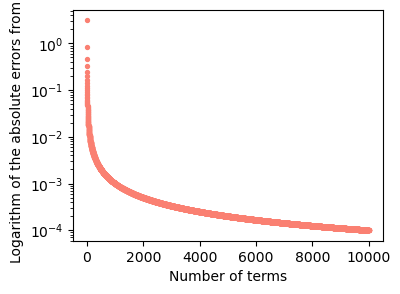

In [209]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
n=[i for i in range(10000)]
l=[abs(leibniz_j(i)*4-math.pi) for i in range(10000)]

plt.scatter(n,l, color='salmon', s=8)
# plt.loglog(n, l, marker='o', linestyle='-', color='b')
plt.yscale('log')
# plt.xscale('log')

plt.ylabel('Logarithm of the absolute errors from π')
plt.xlabel('Number of terms')


plt.savefig('error1.png',dpi=300, bbox_inches='tight')
plt.show()

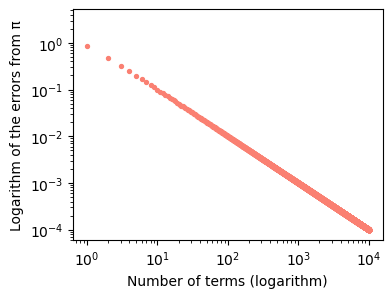

In [210]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
n=[i for i in range(10000)]
l=[abs(leibniz_j(i)*4-math.pi) for i in range(10000)]

plt.scatter(n,l, color='salmon', s=8)
# plt.loglog(n, l, marker='o', linestyle='-', color='b')
plt.yscale('log')
plt.xscale('log')

plt.ylabel('Logarithm of the errors from π')
plt.xlabel('Number of terms (logarithm)')

plt.savefig('error2.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
## Plot instrumented profiling results

In [249]:
#3k
ins_3k={'Set parameters': 3.0640242099761963,
'Set Args': 0.0010790824890136719,
'Read data': 0.11924076080322266,
'Basic filtering': 0.09637784957885742,
'Normalize': 0.0384523868560791,
'High variable genes': 0.09325027465820312,
'Scale': 0.043178558349609375,
'PCA': 1.021111249923706,
'Neighborhood graph': 1.9365432262420654,
'Louvain': 0.11918163299560547,
'Umap': 9.346332311630249,
'Write results': 0.1638803482055664,
'rank_genes_groups': 2.026524305343628}

#6k
ins_6k={'Set parameters': 3.017063617706299,
'Set Args': 0.0010309219360351562,
'Read data': 0.1621112823486328,
'Basic filtering': 0.14645051956176758,
'Normalize': 0.06695771217346191,
'High variable genes': 0.07985877990722656,
'Scale': 0.07592535018920898,
'PCA': 0.47402524948120117,
'Neighborhood graph': 1.8416447639465332,
'Louvain': 0.33850836753845215,
'Umap': 18.23888850212097,
'Write results': 0.26271867752075195,
'rank_genes_groups': 3.426133871078491}

#10k
ins_10k={'Set parameters': 3.020127296447754,
'Set Args': 0.0010416507720947266,
'Read data': 0.6299681663513184,
'Basic filtering': 0.8351829051971436,
'Normalize': 0.4422876834869385,
'High variable genes': 0.5025997161865234,
'Scale': 0.17174959182739258,
'PCA': 1.9386589527130127,
'Neighborhood graph': 19.223905563354492,
'Louvain': 1.0617589950561523,
'Umap': 18.8920738697052,
'Write results': 0.7300069332122803,
'rank_genes_groups': 14.5833158493042}

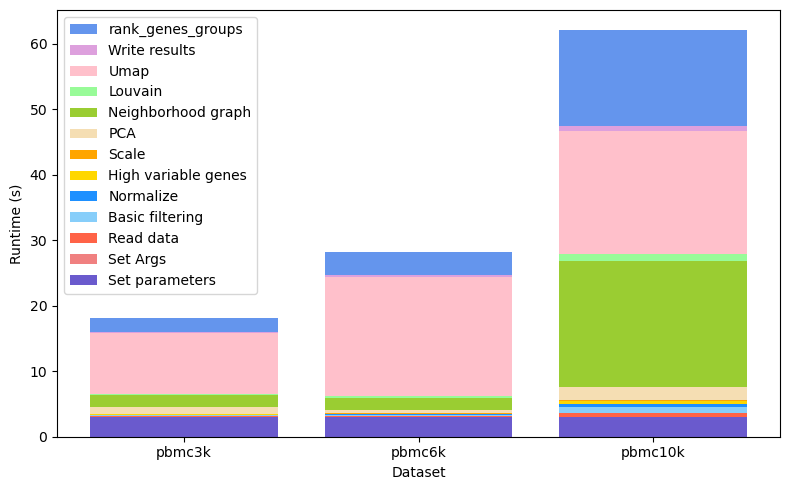

In [261]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ['pbmc3k', 'pbmc6k', 'pbmc10k']
labels=list(ins_3k.keys())
sections=[]
# sections=[setPara, setArgs, readData, basicFilter, normalize, highVG, scale, pca, Ngraph,Louvain, umap, writeResult,rankG]

for i in range(len(labels)):
    # print(i, ins_3k[labels[i]])
    value_list=[ins_3k[labels[i]], ins_6k[labels[i]], ins_10k[labels[i]]]
    sections.append(value_list)
# print(sections)

colors=['slateblue','lightcoral','tomato','lightskyblue','dodgerblue','gold','orange','wheat','yellowgreen','palegreen','pink','plum','cornflowerblue']
# Plot
fig, ax = plt.subplots(figsize=(8,5))
bottom = np.zeros(len(datasets))

for section, label, color in zip(sections, labels, colors):
    
    ax.bar(datasets, section, bottom=bottom, label=label, color=color)
    bottom += section  # stack on top

ax.set_ylabel('Runtime (s)')
ax.set_xlabel('Dataset')
# ax.set_title('Instrumented Runtime per Code Section')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc="upper left")
# ax.legend()
plt.tight_layout()
plt.savefig('instrumentedProfile.png', dpi=300)
plt.show()


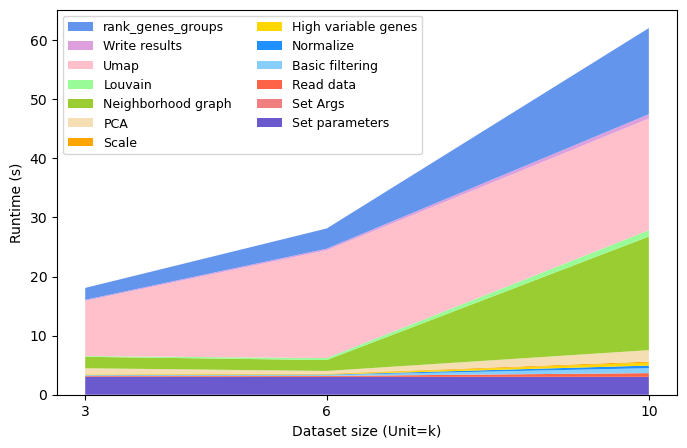

In [260]:
import matplotlib.pyplot as plt
import numpy as np

datasets = np.array([3,6,10])  # k cells
sections=np.array(sections)

# print(sections.shape)
colors=['slateblue','lightcoral','tomato','lightskyblue','dodgerblue','gold','orange','wheat','yellowgreen','palegreen','pink','plum','cornflowerblue']


fig, ax = plt.subplots(figsize=(8,5))
ax.stackplot(datasets, sections, labels=labels, colors=colors)
ax.set_xlabel('Dataset size (Unit=k)')
ax.set_ylabel('Runtime (s)')
ax.set_xticks([3, 6, 10])
# ax.set_title('Instrumented Runtime per Code Section')
# ax.legend(loc='upper left')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc="upper left", ncol=2, fontsize=9)

plt.savefig('instrumentedProfile.png', dpi=300)
plt.show()
